<b>1. What is the motivation?</b>
<p style="color:red"> Churn has been increased.


<b>2. What is the problem's root?</b>
<p style="color:red">Determine if a client will be a churn event.


<b>3. Who is the own of the problem?</b>
<p style="color:red">CEO of the company.

<b>4. How will be the solution?</b>
<p style="color:red">Problem type: churn prediction;
<p style="color:red">Methods: classification algorithms;
<p style="color:red">Delivery format: application when you can find possible churn clients.

# 0. Imports

In [1]:
import pandas as pd
import numpy as np

import inflection

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Help function

In [2]:
# help functions
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()


jupyter_settings()

## 0.2 Loading dataset 

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None) # show all columns

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 0.3 Metadata 

'customerID' = Customer ID <br>
'gender' = Female or Male <br>
'senior_citizen' = Whether the customer is a senior citizen or not (1, 0) <br>
'partner' = Whether the customer has a partner or not (Yes, No) <br>
'dependents' = Whether the customer has dependents or not (Yes, No) <br>
'tenure' = Number of months the customer has stayed with the company <br>
'phone_service' = Whether the customer has a phone service or not (Yes, No) <br>
'multiple_lines' = Whether the customer has multiple lines or not (Yes, No, No phone service) <br>
'internet_service' = Customer’s internet service provider (DSL, Fiber optic, No) <br>
'online_security' = Whether the customer has online security or not (Yes, No, No internet service) <br>
'online_backup' = Whether the customer has online backup or not (Yes, No, No internet service) <br>
'device_protection' = Whether the customer has device protection or not (Yes, No, No internet service) <br>
'tech_support' = Whether the customer has tech support or not (Yes, No, No internet service) <br>
'streaming_tv' = Whether the customer has streaming TV or not (Yes, No, No internet service) <br>
'streaming_movies = Whether the customer has streaming movies or not (Yes, No, No internet service) <br>
'contract' = The contract term of the customer (Month-to-month, One year, Two year) <br>
'paper_less_billing' = Whether the customer has paperless billing or not (Yes, No) <br>
'payment_method' = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) <br>
'monthly_charges' = The amount charged to the customer monthly <br>
'total_charges' = The total amount charged to the customer <br>
'churn' = Whether the customer churned or not (Yes or No)

## 1.0 Renaming columns, checking shape of dataset, checking null values, etc 

In [4]:
df1 = df.copy()

In [5]:
# data dimensions
print(f'number of rows: {df1.shape[0]}')
print(f'number of columns: {df1.shape[1]}')
print('---'*30)

# renaming columns
cols_old = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# finishing rename
df1.columns = cols_new

df1.info()

number of rows: 7043
number of columns: 21
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null  

In [6]:
# column total_charges in not object, but float number
# we will change to numeric column, but we have some empty lines
# using errors='coerce' we could change the column
df1['total_charges'] = pd.to_numeric(df1['total_charges'], errors='coerce')
display(df1.isnull().sum())

# we have now 11 empty lines on column 'total_charges'
# 11 lines are least than 1% of our data, so we will remove this lines
df1 = df1[~df1['total_charges'].isnull()]
print('---'*30)
display(df.isnull().sum())

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

------------------------------------------------------------------------------------------


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 1.2 Target column evalutation

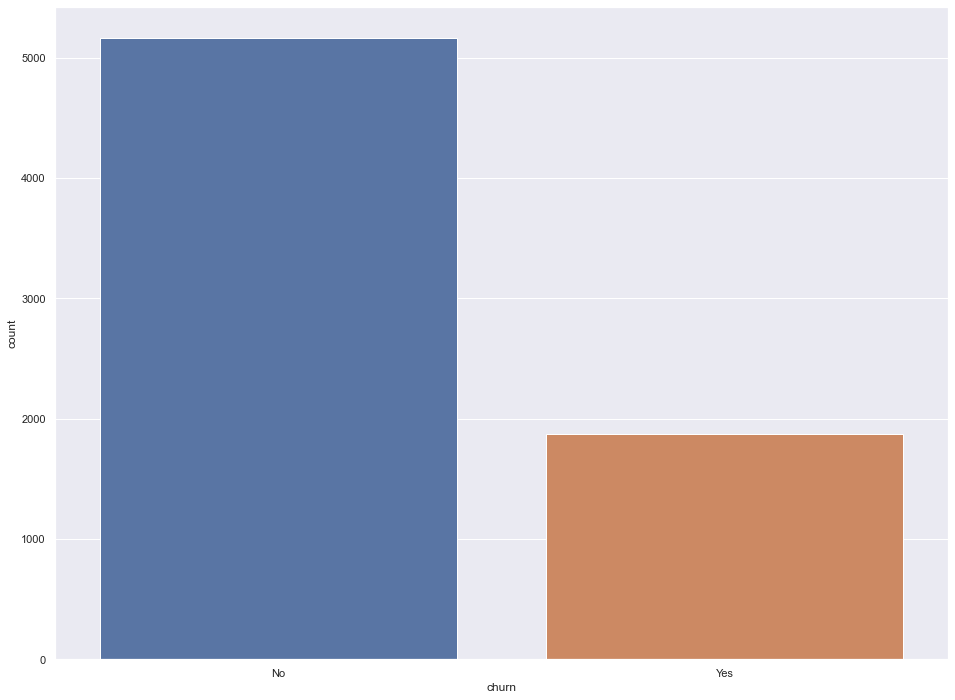

In [7]:
# count churn and not churn class
sns.countplot(x='churn', data=df1);

## 1.3 Numerical data 

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,total_charges,18.80,8684.80,8666.0,2283.300441,1397.475,2266.610181,0.961642,-0.231799
1,monthly_charges,18.25,118.75,100.5,64.798208,70.350,30.083835,-0.222103,-1.256156
2,tenure,1.00,72.00,71.0,32.421786,29.000,24.543514,0.237731,-1.387823


------------------------------------------------------------------------------------------


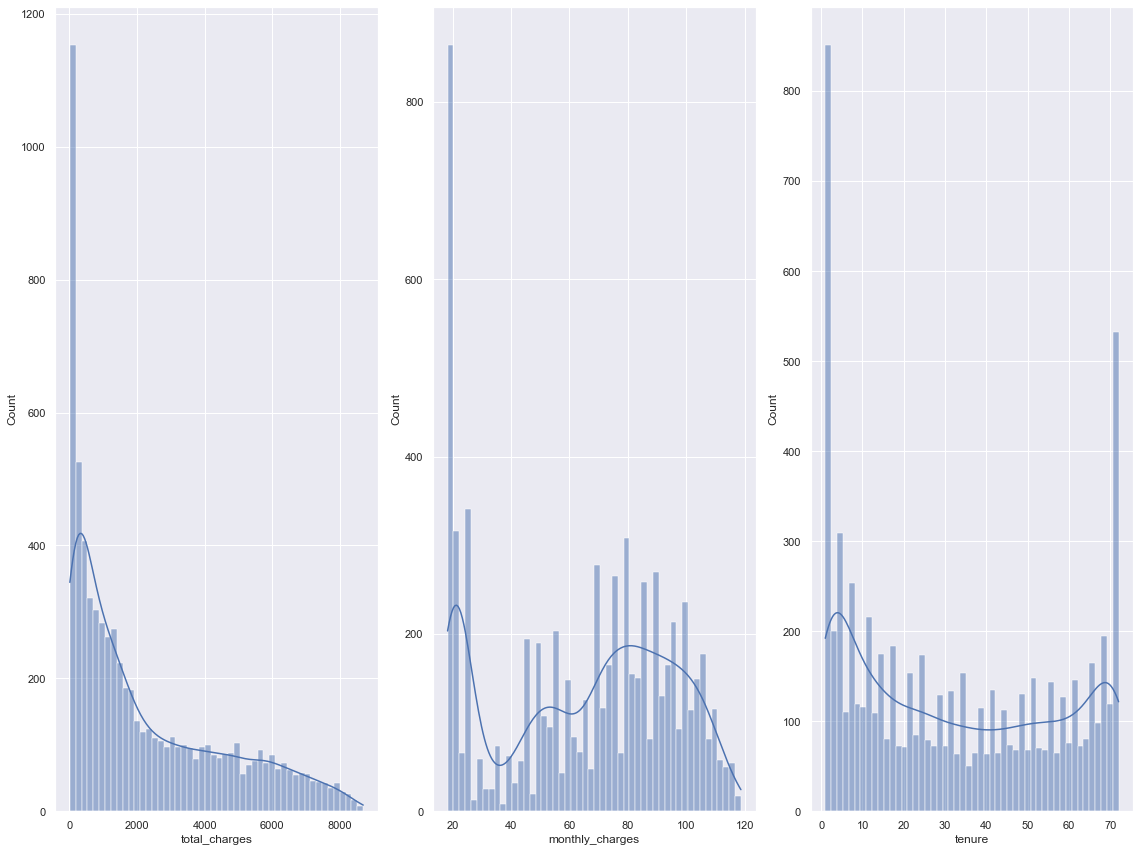

In [8]:
# evalution of numeric attributes
num_attributes = df1[['total_charges', 'monthly_charges', 'tenure']]

# central tendency (mean, median) 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion (std, min, max, range, skew, kurtosis) 
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenating data
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

display(m)
print('---'*30)

# total_charges and month_charges histograms
plt.subplot(1,3,1)
sns.histplot(x='total_charges', data=df1, kde=True, bins=50)

plt.subplot(1,3,2)
sns.histplot(x='monthly_charges', data=df1, kde=True, bins=50);

plt.subplot(1,3,3)
sns.histplot(x='tenure', data=df1, kde=True, bins=50);

plt.tight_layout()

## 1.4 Categorical data

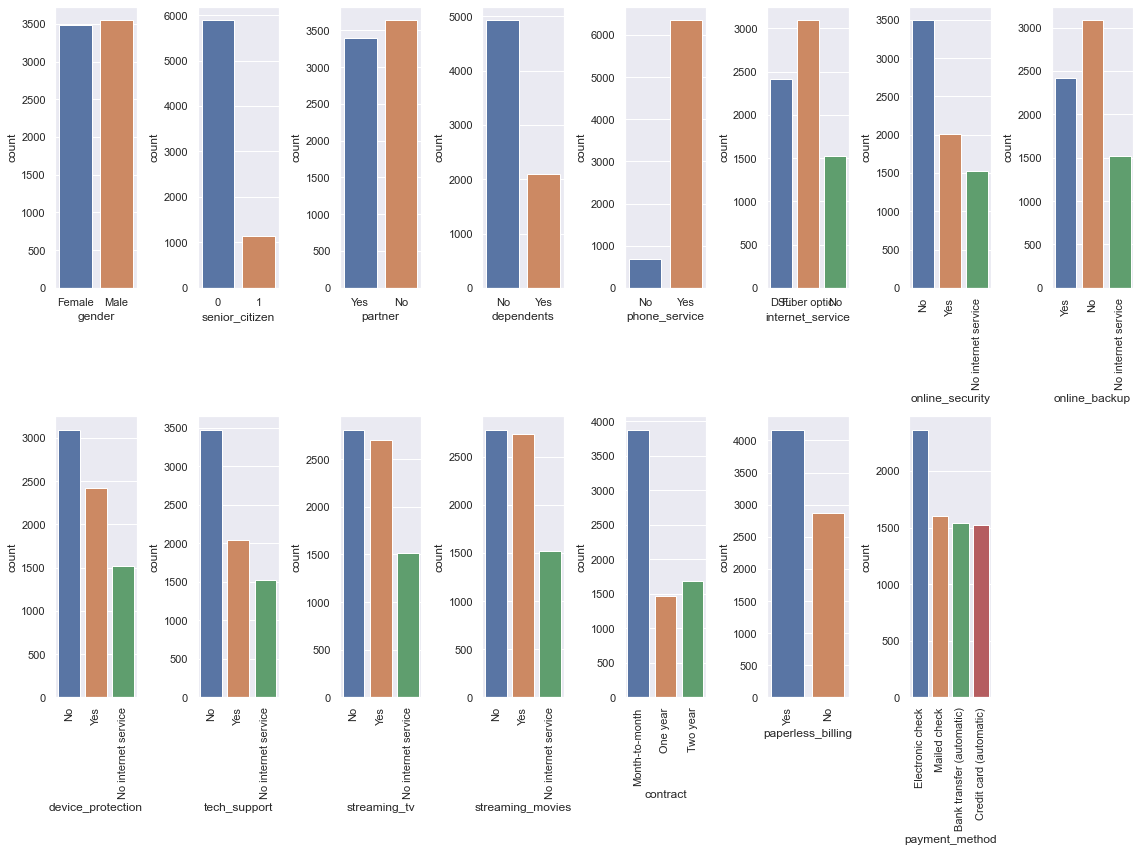

In [9]:
# evaluation of categorical attributes
aux1 = df1[['gender', 'senior_citizen', 'partner', 'dependents',
            'phone_service', 'multiple_lines', 'internet_service',
            'online_security', 'online_backup', 'device_protection', 'tech_support',
            'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
            'payment_method']]

plt.subplot(2,8,1)
sns.countplot(x='gender', data=aux1)

plt.subplot(2,8,2)
sns.countplot(x='senior_citizen', data=aux1)

plt.subplot(2,8,3)
sns.countplot(x='partner', data=aux1)

plt.subplot(2,8,4)
sns.countplot(x='dependents', data=aux1)

plt.subplot(2,8,5)
sns.countplot(x='phone_service', data=aux1)

plt.subplot(2,8,6)
sns.countplot(x='internet_service', data=aux1)

plt.subplot(2,8,7)
sns.countplot(x='online_security', data=aux1)
plt.xticks(rotation=90)

plt.subplot(2,8,8)
sns.countplot(x='online_backup', data=aux1)
plt.xticks(rotation=90)

plt.subplot(2,8,9)
sns.countplot(x='device_protection', data=aux1)
plt.xticks(rotation=90)

plt.subplot(2,8,10)
sns.countplot(x='tech_support', data=aux1)
plt.xticks(rotation=90)

plt.subplot(2,8,11)
sns.countplot(x='streaming_tv', data=aux1)
plt.xticks(rotation=90)

plt.subplot(2,8,12)
sns.countplot(x='streaming_movies', data=aux1)
plt.xticks(rotation=90);

plt.subplot(2,8,13)
sns.countplot(x='contract', data=aux1)
plt.xticks(rotation=90);

plt.subplot(2,8,14)
sns.countplot(x='paperless_billing', data=aux1)
plt.xticks(rotation=90);

plt.subplot(2,8,15)
sns.countplot(x='payment_method', data=aux1)
plt.xticks(rotation=90);

plt.tight_layout();

# 2. Hypothesis

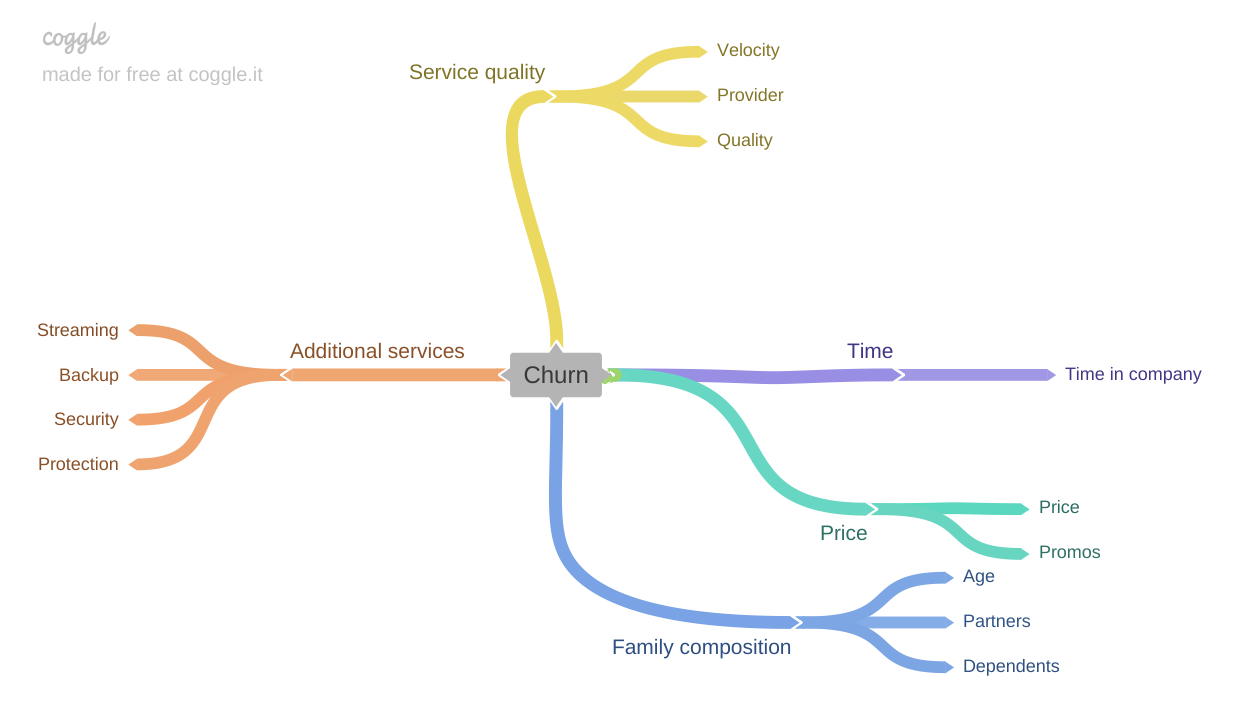

In [11]:
Image('Churn.png')